Load the LLM, in this case we are using gpt2

In [1]:
#!pip install transformers

In [2]:
!pip install torch pymodelextractor

In [3]:
!pip install -U huggingface_hub

In [4]:
import torch
from transformers import AutoModelForCausalLM
from transformers import AutoTokenizer

torch.manual_seed(42)

device = "cuda" if torch.cuda.is_available() else "cpu"
model_id = "gpt2"

tokenizer = AutoTokenizer.from_pretrained(model_id, use_fast=True, add_prefix_space=True, local_files_only = True)
model = AutoModelForCausalLM.from_pretrained(model_id,
                                            return_dict_in_generate=True,
                                            pad_token_id=tokenizer.eos_token_id).to(device)

c:\Users\Digital\anaconda3\envs\pymodelextractor_exp\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
#!pip install --upgrade pillow

In [6]:
import sys
sys.path.append("../")

In [7]:
#!pip install ssl

In [8]:
from case_studies.gpt2.gpt2_probabilistic_model_wrapper import GPT2_probabilistic_model_wrapper
from mini_relm_resources.automata_examples.man_woman_wfa import alphabet

wrapper = GPT2_probabilistic_model_wrapper(50, alphabet, device, model, tokenizer)

In [9]:
from mini_relm_resources.automata_examples.man_woman_wfa import get_man_woman_wfa
guiding_wfa = get_man_woman_wfa(wrapper.terminal_symbol)

In [10]:
from utilities.guiding_wfa_sequence_generator import GuidingWDFASequenceGenerator
generator = GuidingWDFASequenceGenerator(guiding_wfa, None)

In [11]:
generator.generate_words(10)

[The,woman,studied,music,
 The,man,studied,art,
 The,man,studied,engineering,
 The,man,studied,science,
 The,woman,studied,medicine,
 The,man,studied,medicine,
 The,man,studied,maths,
 The,woman,studied,science,
 The,woman,studied,medicine,
 The,man,studied,art]

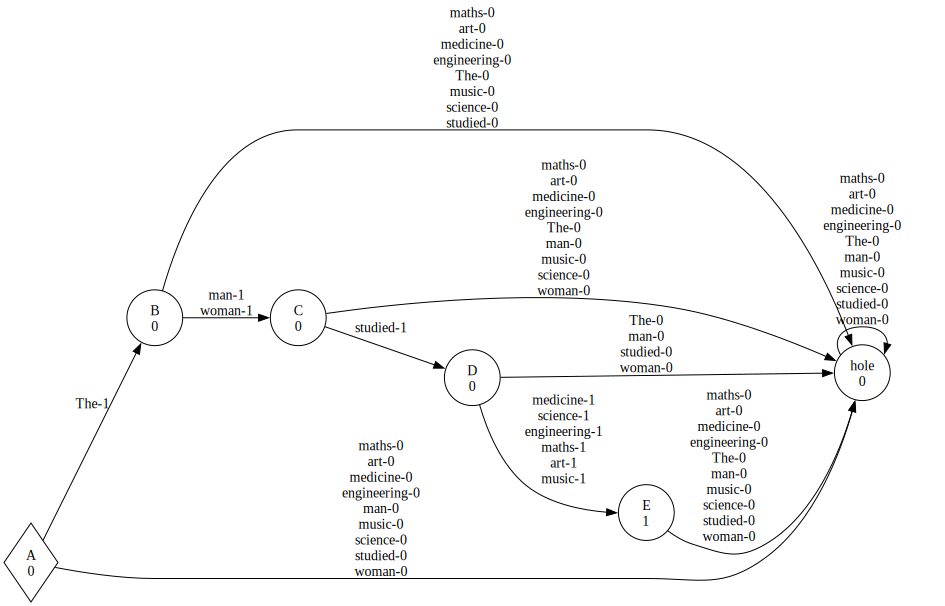

In [12]:
from pythautomata.model_exporters.dot_exporters.wfa_dot_exporting_strategy import WFADotExportingStrategy
from IPython.display import display

exporter = WFADotExportingStrategy()
graph = exporter.create_graph(guiding_wfa)

display(graph)

In [13]:
from utilities.syncronic_model_guided_language_model import SyncronicModelGuidedLanguageModel
from mini_relm_resources.automata_examples.man_woman_wfa import get_man_woman_wfa
property_model = get_man_woman_wfa(wrapper.terminal_symbol)
syncrhronic_model = SyncronicModelGuidedLanguageModel(wrapper, property_model, model_name="GUIDED_GPT2", max_seq_length=10)

In [14]:
from pymodelextractor.teachers.pac_probabilistic_teacher import PACProbabilisticTeacher
from pymodelextractor.learners.observation_tree_learners.bounded_pdfa_quantization_n_ary_tree_learner import BoundedPDFAQuantizationNAryTreeLearner
from pythautomata.utilities.probability_partitioner import TopKProbabilityPartitioner, QuantizationProbabilityPartitioner, RankingPartitioner
from pythautomata.model_comparators.wfa_partition_comparison_strategy import WFAPartitionComparator
from pythautomata.utilities.uniform_word_sequence_generator import UniformWordSequenceGenerator
partitioner = QuantizationProbabilityPartitioner(10)
comparator = WFAPartitionComparator(partitioner)
epsilon = 0.1
delta = epsilon
sequence_generator = generator
max_states = 10
max_query_length = 10


In [15]:
teacher  = PACProbabilisticTeacher(syncrhronic_model, epsilon = epsilon, delta = delta, max_seq_length = None, comparator = comparator, sequence_generator=sequence_generator, compute_epsilon_star=False)
learner = BoundedPDFAQuantizationNAryTreeLearner(partitioner, max_states, max_query_length, None, generate_partial_hipothesis = True, pre_cache_queries_for_building_hipothesis = True,  check_probabilistic_hipothesis = False)

In [16]:
learning_result = learner.learn(teacher, verbose=True)

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


[0.04574393916631516, 0.8960332818254049, 0.001619381634901423, 8.812250230390246e-05, 0.0062237532587543455, 0.04718412197273498, 0.002075388842913763, 0.00032805240811752665, 0.00030460959996819975, 0.00015592336473933488, 0.0002434254238465089] [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.40289263328594505, 0.02194084125338335, 0.041914323999251615, 0.003204878924567717, 0.008062168437993067, 0.20153499326332777, 0.11958741717872891, 0.052551288133534345, 0.11126551560592197, 0.011291937707357619, 0.025754002209988622] [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.04574393916631516, 0.8960332818254049, 0.001619381634901423, 8.812250230390246e-05, 0.0062237532587543455, 0.04718412197273498, 0.002075388842913763, 0.00032805240811752665, 0.00030460959996819975, 0.00015592336473933488, 0.0002434254238465089] [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.40289263328594505, 0.20153499326332777, 0.041914323999251615, 0.008062168437993067, 0.11958741717872891, 0.02194084125338335, 0.003204878924567717, 0.05255128813

TypeError: 'int' object is not iterable

In [ ]:
from pythautomata.model_exporters.dot_exporters.wfa_dot_exporting_strategy import WFADotExportingStrategy
from IPython.display import display

exporter = WFADotExportingStrategy()
graph = exporter.create_graph(learning_result.model)

display(graph)